In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import pandas as pd
import seaborn as sns

In [5]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
df_diamonds = pd.get_dummies(df_diamonds, drop_first=True)

median_price = df_diamonds['price'].median()
df_diamonds['price_above_median'] = (df_diamonds['price'] > median_price).astype(int) 

In [9]:
df_diamonds.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1,price_above_median
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,True,False,False,...,True,False,False,False,False,True,False,False,False,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,True,...,False,True,False,False,False,False,False,True,False,0


In [10]:
x = df_diamonds.drop(columns=['price', 'price_above_median'])
y = df_diamonds['price_above_median']

In [11]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.5, random_state=2)

In [12]:
ns_probs = [0 for _ in range(len(testY))]

In [15]:
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(trainX, trainY)

LogisticRegression(max_iter=2000)

In [16]:
# predicciones de posibilidades
lr_probs = model.predict_proba(testX)
# nos quedamos con las probabildades de la clase positiva (la probabilidad es de 1)
lr_probs = lr_probs[:, 1]

In [17]:
ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_probs)

In [19]:
ns_auc = roc_auc_score(testY, ns_probs)
lr_auc = roc_auc_score(testY, lr_probs)

In [20]:
print('Sin entrenar: ROC AUC= %.3F' % (ns_auc))
print('Regresión Logística: ROC AUC= %.3f' % (lr_auc))

Sin entrenar: ROC AUC= 0.500
Regresión Logística: ROC AUC= 0.998


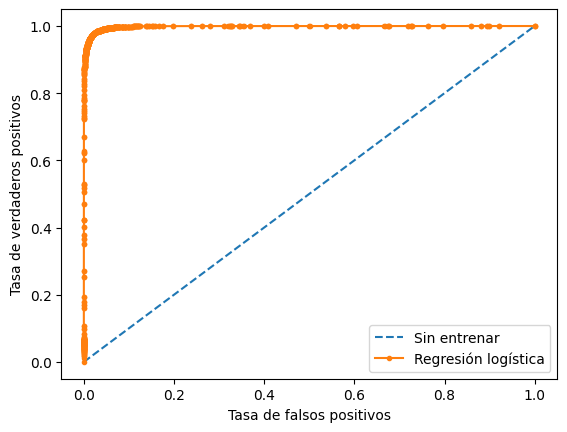

In [21]:
# graficamos la curva de roc
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión logística')

# etiquetas de los ejes
pyplot.xlabel('Tasa de falsos positivos')
pyplot.ylabel('Tasa de verdaderos positivos')
pyplot.legend()
pyplot.show()

In [22]:
"""
¿Qué representa el área bajo la curva ROC (AUC)?
Area under the curve (AUC) representa la capacidad de 
un modelo para distinguir entre distintas clases. Mientras más cercano 
esté al 1 indica una mayor precisión y al estár cercano al 0.5 
hablamos de valores aleatorios
"""
"""
¿Por qué es útil comparar con un modelo sin entrenamiento?
Nos sirve para tomar ocmo referencia base para evaluar si el modelo entranado 
realmente aprendió algo útil o si su rendimiento es similar al azar
"""
"""
¿Qué podrías hacer si el modelo no converge?
Se puede modificar el solver, el número de iteraciones o depurar el banco de datos
"""

'\n¿Qué podrías hacer si el modelo no converge?\nSe puede modificar el solver, el número de iteraciones o depurar el banco de datos\n'